<a href="https://colab.research.google.com/github/gagan3012/notebooks/blob/master/Zero_Shot_learning_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install newspaper3k==0.2.8 transformers

     |████████████████████████████████| 211 kB 10.7 MB/s 
     |████████████████████████████████| 3.1 MB 27.6 MB/s 
     |████████████████████████████████| 7.4 MB 14.9 MB/s 
     |████████████████████████████████| 81 kB 8.2 MB/s 
     |████████████████████████████████| 87 kB 5.9 MB/s 
     |████████████████████████████████| 895 kB 28.2 MB/s 
     |████████████████████████████████| 596 kB 40.7 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 3.3 MB 24 kB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=731bf31fe864e7949e38a6dd76b375f55b707d235a38d94fd681f3bddfed297a
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=be23d422261a92d2c2f6511b49cb6e391f87bcc5afcac941c6aac85b7a574572
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e

####ZSL
This is the checkpoint for bart-large after being trained on the MultiNLI (MNLI) dataset.

Additional information about this model:

The bart-large model page
BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension
BART fairseq implementation
NLI-based Zero Shot Text Classification
Yin et al. proposed a method for using pre-trained NLI models as a ready-made zero-shot sequence classifiers. The method works by posing the sequence to be classified as the NLI premise and to construct a hypothesis from each candidate label. For example, if we want to evaluate whether a sequence belongs to the class "politics", we could construct a hypothesis of This text is about politics.. The probabilities for entailment and contradiction are then converted to label probabilities.

This method is surprisingly effective in many cases, particularly when used with larger pre-trained models like BART and Roberta. See this blog post for a more expansive introduction to this and other zero shot methods, and see the code snippets below for examples of using this model for zero-shot classification both with Hugging Face's built-in pipeline and with native Transformers/PyTorch code.

In [3]:
import pandas as pd

data = pd.read_csv("/content/new_articles.csv")
data

,Unnamed: 0,Unnamed: 0.1,id,title,publication,author,date,year,month,url,content
0,0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...
5,5,103464,151914,My dad’s Reagan protests inspire me to stand u...,Guardian,Steven W Thrasher,2016-11-28,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,I have been battling depression and sleeplessn...
6,6,103465,151915,Flatmates of gay Syrian refugee beheaded in Tu...,Guardian,Patrick Kingsley,2016-08-07,2016.0,8.0,https://www.theguardian.com/world/2016/aug/07/...,Three flatmates of a gay Syrian refugee behead...
7,7,103466,151916,Jaffas and daredevils: life on the world’s ste...,Guardian,Eleanor Ainge Roy,2016-07-22,2016.0,7.0,https://www.theguardian.com/world/2016/jul/23/...,", Most people take 10 minutes to climb the wor..."
8,8,103467,151917,NSA contractor arrested for alleged theft of t...,Guardian,Ewen MacAskill,2016-10-05,2016.0,10.0,https://www.theguardian.com/us-news/2016/oct/0...,The FBI has arrested a National Security Agenc...
9,9,103468,151918,Donald Trump to dissolve his charitable founda...,Guardian,Ben Jacobs,2016-12-24,2016.0,12.0,https://www.theguardian.com/us-news/2016/dec/2...,Donald Trump announced on Saturday that he wil...


In [4]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [15]:
def zsl_exp(df,candidate_labels):
  res_list = []
  for i in range(len(df)):
    sequence_to_classify =df["content"][i]
    print(sequence_to_classify)
    #candidate_labels = ["Politics","Terrroism","Religion"]

    data = classifier(sequence_to_classify, candidate_labels, multi_label=False)
    labels = data["labels"]
    scores = data['scores']

    res = {labels[i]: scores[i] for i in range(len(labels))}
    res['seq'] = sequence_to_classify
    res['Number'] = i
    res_list.append(res)

  df_new = pd.DataFrame(res_list)
  
  return df_new

In [19]:
zsl_list= zsl_exp(data,["Politics","Terrroism","Religion"])

The son of a Louisiana man whose father was shot and killed at   range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the    son of Alton Sterling, whose death at the hands of police was caught on video, spoke about his father and protests.  Alton Sterling was killed by Baton Rouge police on 5 July at a convenience store, where he was said to be selling CDs. Baton Rouge police said in a statement that police were called to the convenience store because Sterling had allegedly threatened another patron with a gun.  The press conference on Wednesday is Cameron’s first since he broke into sobs at a nationally broadcast press conference with his mother, following his father’s death. “I came to talk to everyone about one: the death of my father. And, two: about how I feel about people in general,” said Cameron, whose distinctly young voice was calm and composed in front of the scrum of reporters at the Triple S convenience store. “Peo

In [24]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot


def plot_zsl(data,themes,selected_theme):
  #zsl_list= zsl_exp(data,themes)
  if selected_theme not in themes:
    return None
  df1 = zsl_list[[selected_theme]]
  def estimate_gaussian(dataset):

    mu = np.mean(dataset) # moyenne cf mu
    sigma = np.std(dataset) # écart_type/standard deviation
    limit = sigma * 1.5

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

  mu, sigma, min_threshold, max_threshold = estimate_gaussian(df1.values)

  condition1 = (df1 < min_threshold)
  condition2 = (df1 > max_threshold)

  outliers1 = np.extract(condition1, df1)
  outliers2 = np.extract(condition2, df1)

  outliers = np.concatenate((outliers1, outliers2), axis=0)

  df_red = df1[df1.values==outliers]
  print(df1)

  plt.scatter(df1.index,df1.values)
  plt.scatter(df_red.index,df_red.values,c='red')

    Politics
0   0.333321
1   0.260916
2   0.173911
3   0.219388
4   0.358610
5   0.269290
6   0.393440
7   0.420593
8   0.279842
9   0.540387
10  0.228824
11  0.653746
12  0.422844
13  0.456607
14  0.309161
15  0.412503
16  0.425206
17  0.406113
18  0.798655
19  0.790029
20  0.291513
21  0.260377
22  0.287691
23  0.143373
24  0.577525


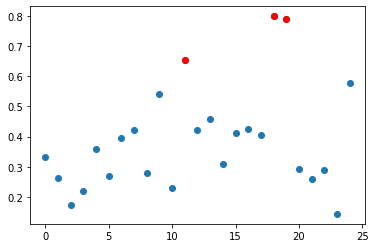

In [26]:
selected_theme = "Politics" #@param ["Politics","Terrroism","Religion"]

plot_zsl(data=data,themes=["Politics","Terrroism","Religion"],selected_theme=selected_theme)